# Protecsa Ejercicio 4

In [ ]:
import importlib
import sys
import subprocess

def instalar_si_no(paquete, nombre=None):
  if nombre is None:
    nombre = paquete
  try:
    importlib.import_module(paquete)
    print(f"{nombre} ya está instalado")
  except ImportError:
    print(f"Instalando {nombre}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])
    print(f"{nombre} instalado")

instalar_si_no("numpy")
instalar_si_no("matplotlib")
instalar_si_no("seaborn")
instalar_si_no("polars")
instalar_si_no("scikit-learn", "Sklearn")

numpy ya está instalado
matplotlib ya está instalado
seaborn ya está instalado
polars ya está instalado
Instalando Sklearn...
Sklearn instalado


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

In [ ]:
# extrayendo los archivos csv
dfLinks = pl.read_csv("links.csv")
dfMovies = pl.read_csv("movies.csv")
dfRatings = pl.read_csv("ratings.csv")
dfTags = pl.read_csv("tags.csv")


In [ ]:
dfLinks.head(5)

movieId,imdbId,tmdbId
i64,i64,i64
1,114709,862
2,113497,8844
3,113228,15602
4,114885,31357
5,113041,11862


In [ ]:
dfRatings.head(5)

userId,movieId,rating,timestamp
i64,i64,f64,i64
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931


In [ ]:
dfTags.head(5)

userId,movieId,tag,timestamp
i64,i64,str,i64
2,60756,"""funny""",1445714994
2,60756,"""Highly quotable""",1445714996
2,60756,"""will ferrell""",1445714992
2,89774,"""Boxing story""",1445715207
2,89774,"""MMA""",1445715200


In [ ]:
#eliminando el timestamp
dfTags = dfTags.drop("timestamp")
dfRatings = dfRatings.drop("timestamp")
dfRatings = dfRatings.with_columns(
    ((pl.col("rating") - 1.0) / 4.0).alias("rating")
)
dfRatings

userId,movieId,rating
i64,i64,f64
1,1,0.75
1,3,0.75
1,6,0.75
1,47,1.0
1,50,1.0
…,…,…
610,166534,0.75
610,168248,1.0
610,168250,1.0


Como se logra apreciar, se puede sararar la columna de generos en diferentes secciones

In [ ]:
dfMovies.head(5)

movieId,title,genres
i64,str,str
1,"""Toy Story (1995)""","""Adventure|Animation|Children|C…"
2,"""Jumanji (1995)""","""Adventure|Children|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama|Romance"""
5,"""Father of the Bride Part II (1…","""Comedy"""


In [ ]:
dfMovies.filter(
    pl.col("genres").is_null() | (pl.col("genres") == "NaN")
)
#no hay valores nula


movieId,title,genres
i64,str,str


In [ ]:
dfMovies.filter(
    pl.col("title").is_null() | (pl.col("genres") == "NaN")
)

movieId,title,genres
i64,str,str


In [ ]:
generos = (
    dfMovies ["genres"].str.split("|").explode().unique().sort()
)
print(generos)

for genero in generos:
    dfMovies = dfMovies.with_columns(
        pl.col("genres").str.contains(genero).cast(pl.Int8).alias(genero)
    )
dfMovies.head(5)

shape: (20,)
Series: 'genres' [str]
[
	"(no genres listed)"
	"Action"
	"Adventure"
	"Animation"
	"Children"
	…
	"Romance"
	"Sci-Fi"
	"Thriller"
	"War"
	"Western"
]


movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
i64,str,str,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
1,"""Toy Story (1995)""","""Adventure|Animation|Children|C…",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"""Jumanji (1995)""","""Adventure|Children|Fantasy""",0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,"""Grumpier Old Men (1995)""","""Comedy|Romance""",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,"""Waiting to Exhale (1995)""","""Comedy|Drama|Romance""",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,"""Father of the Bride Part II (1…","""Comedy""",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ya no se ocupa la columna de generos

In [ ]:
#Eliminando la columna de generos
dfMovies = dfMovies.drop("genres")
dfMovies.head(5)

movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
i64,str,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
1,"""Toy Story (1995)""",0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"""Jumanji (1995)""",0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,"""Grumpier Old Men (1995)""",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,"""Waiting to Exhale (1995)""",0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,"""Father of the Bride Part II (1…",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Para importar el dataset se utilizara la versión pequeña de la seccion de educación de la pagina de [MovieLens](https://grouplens.org/datasets/movielens/)

Ahora juntaremos los dataframes por medio del movie id

In [ ]:
df = dfRatings.join(dfMovies.select(['movieId','title']), on = "movieId", how = "left", )
df

userId,movieId,rating,title
i64,i64,f64,str
1,1,0.75,"""Toy Story (1995)"""
1,3,0.75,"""Grumpier Old Men (1995)"""
1,6,0.75,"""Heat (1995)"""
1,47,1.0,"""Seven (a.k.a. Se7en) (1995)"""
1,50,1.0,"""Usual Suspects, The (1995)"""
…,…,…,…
610,166534,0.75,"""Split (2017)"""
610,168248,1.0,"""John Wick: Chapter Two (2017)"""
610,168250,1.0,"""Get Out (2017)"""


los volvemos listas

In [ ]:
usuarios = df.select("userId").to_numpy().flatten()
peliculas = df.select("title").to_numpy().flatten()
ratings = df.select("rating").to_numpy().flatten()

se checan duplicados

In [ ]:
df.filter(df.is_duplicated())

userId,movieId,rating,title
i64,i64,f64,str


Se cuentan nulos

In [ ]:
for col in df.columns:
    print(f"Column '{col}': {df[col].is_null().sum()} null values")

Column 'userId': 0 null values
Column 'movieId': 0 null values
Column 'rating': 0 null values
Column 'title': 0 null values


In [ ]:
df.schema

Schema([('userId', Int64),
        ('movieId', Int64),
        ('rating', Float64),
        ('title', String)])

In [ ]:
df.describe()

statistic,userId,movieId,rating,title
str,f64,f64,f64,str
"""count""",100836.0,100836.0,100836.0,"""100836"""
"""null_count""",0.0,0.0,0.0,"""0"""
"""mean""",326.127564,19435.295718,0.625389,null
"""std""",182.618491,35530.987199,0.260632,null
"""min""",1.0,1.0,-0.125,"""'71 (2014)"""
"""25%""",177.0,1199.0,0.5,null
"""50%""",325.0,2991.0,0.625,null
"""75%""",477.0,8121.0,0.75,null
"""max""",610.0,193609.0,1.0,"""À nous la liberté (Freedom for…"


Se buscan duplicados

In [ ]:
num_duplicados = df.select(
    df.select(["userId", "title"]).is_duplicated().alias("duplicados")
).select(
    pl.col("duplicados").sum()
).item()

print(num_duplicados)


8


se eliminan los duplicados

In [ ]:
df = df.unique(subset=["userId", "title"], keep="first")


Se vulven a checar los duplicados

In [ ]:
num_duplicados = df.select(
    df.select(["userId", "title"]).is_duplicated().alias("duplicados")
).select(
    pl.col("duplicados").sum()
).item()

print(num_duplicados)

0


In [ ]:
print(df["title"].n_unique())

9719


Creando una matriz con las calificaciones por usuario sobre las peliculas

In [ ]:
matrizPeliculas = df.pivot(
    index="userId",
    columns="title",
    values="rating",
).fill_null(0).sort("userId", descending=False)
matrizPeliculas

userId,Jerry Maguire (1996),"Brady Bunch Movie, The (1995)",Platoon (1986),October Sky (1999),Harry Potter and the Deathly Hallows: Part 1 (2010),"Lord of the Rings: The Two Towers, The (2002)",Hot Fuzz (2007),Kalifornia (1993),Apocalypse Now (1979),Quiz Show (1994),The Overnight (2015),The Martian (2015),Zack and Miri Make a Porno (2008),"Great Gatsby, The (2013)","Hunt for Red October, The (1990)",Taken (2008),They Live (1988),"Lost World: Jurassic Park, The (1997)",Muppet Treasure Island (1996),"Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)",Michael (1996),Ronin (1998),Spy Kids (2001),Serenity (2005),Chinatown (1974),"Player, The (1992)",Revenge of the Nerds (1984),"Honey, I Shrunk the Kids (1989)",Radio Days (1987),"Kite Runner, The (2007)",Shall We Dance? (Shall We Dansu?) (1996),Babe: Pig in the City (1998),Problem Child 2 (1991),Elysium (2013),Casper (1995),Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),…,"Call, The (2013)",Big Top Scooby-Doo! (2012),"Big Bang, The (2011)","Apple, The (Sib) (1998)",Goat (2016),From Dusk Till Dawn 2: Texas Blood Money (1999),Vincent Wants to Sea (Vincent will meer) (2010),Taking Care of Business (1990),Five Element Ninjas (1982),Cop (1988),Homefront (2013),Hipsters (Stilyagi) (2008),Burke and Hare (2010),"Blood of Heroes, The (Salute of the Jugger, The) (1989)",Cashback (2004),Starter for 10 (2006),"Last Exorcism, The (2010)","Turning Point, The (1977)",G.B.F. (2013),Hurlyburly (1998),Love and Other Disasters (2006),6 Days to Air: The Making of South Park (2011),"Night, The (Notte, La) (1960)",Head Above Water (1996),Boy Eats Girl (2005),Pekka ja Pätkä salapoliiseina (1957),Sunflower (Xiang ri kui) (2005),"Back-up Plan, The (2010)","Decline of Western Civilization Part II: The Metal Years, The (1988)",Secret Admirer (1985),Microwave Massacre (1983),Ghost in the Shell Arise - Border 2: Ghost Whispers (2013),Flatfoot on the Nile (Piedone d'Egitto) (1980),"Facing Windows (Finestra di fronte, La) (2003)",Hellbenders (2012),Assassination of a High School President (2008),Pathology (2008)
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…

Creando el modelo

In [ ]:
from sklearn.neighbors import NearestNeighbors
matriz_np = matrizPeliculas.to_numpy()
usuarios = matrizPeliculas.select("userId").to_numpy().flatten()
peliculas = matrizPeliculas.columns[1:]

Parte manual del codigo, se ingresa un usuario

In [ ]:
usuario_id = int(input("Ingrese el ID del usuario: "))

Ingrese el ID del usuario: 34


In [ ]:
knn = NearestNeighbors(metric="cosine", algorithm='brute')
knn.fit(matriz_np)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
user = list(usuarios).index(usuario_id)
distancias, indices = knn.kneighbors([matriz_np[user]],n_neighbors=6)

In [ ]:
vecinos = indices[0][1:]
rating_kn = matriz_np[vecinos]

promedios = np.mean(rating_kn, axis=0)
vistas = matriz_np[user] > 0
noVistas = np.where(vistas == False)[0]
recomendaciones = noVistas[np.argsort(promedios[noVistas])[::-1][:5]]

pelisRecomendadas = [peliculas[i] for i in recomendaciones ]

In [ ]:
print("Peliculas recomendadas para el usuario", usuario_id, ":")
for pelicula in pelisRecomendadas:
    print(pelicula)

Peliculas recomendadas para el usuario 34 :
Devil Wears Prada, The (2006)
Repo Man (1984)
City Slickers II: The Legend of Curly's Gold (1994)
Acid House, The (1998)
Dirty Harry (1971)


# Metricas y Gráficas

Al no ser como los otros ejercicios no serán los mismo tipos de metricas


Se puede mostrar las distancias que habia durante el segmentacion de datos

In [ ]:
for i, (dist, idx) in enumerate(zip(distancias[0], indices[0])):
    print(f"Vecino {i}: Usuario ID = {usuarios[idx]}, Distancia (cosine) = {dist:.4f}")


Vecino 0: Usuario ID = 34, Distancia (cosine) = 0.0000
Vecino 1: Usuario ID = 438, Distancia (cosine) = 0.0162
Vecino 2: Usuario ID = 220, Distancia (cosine) = 0.0164
Vecino 3: Usuario ID = 354, Distancia (cosine) = 0.0165
Vecino 4: Usuario ID = 166, Distancia (cosine) = 0.0165
Vecino 5: Usuario ID = 381, Distancia (cosine) = 0.0165


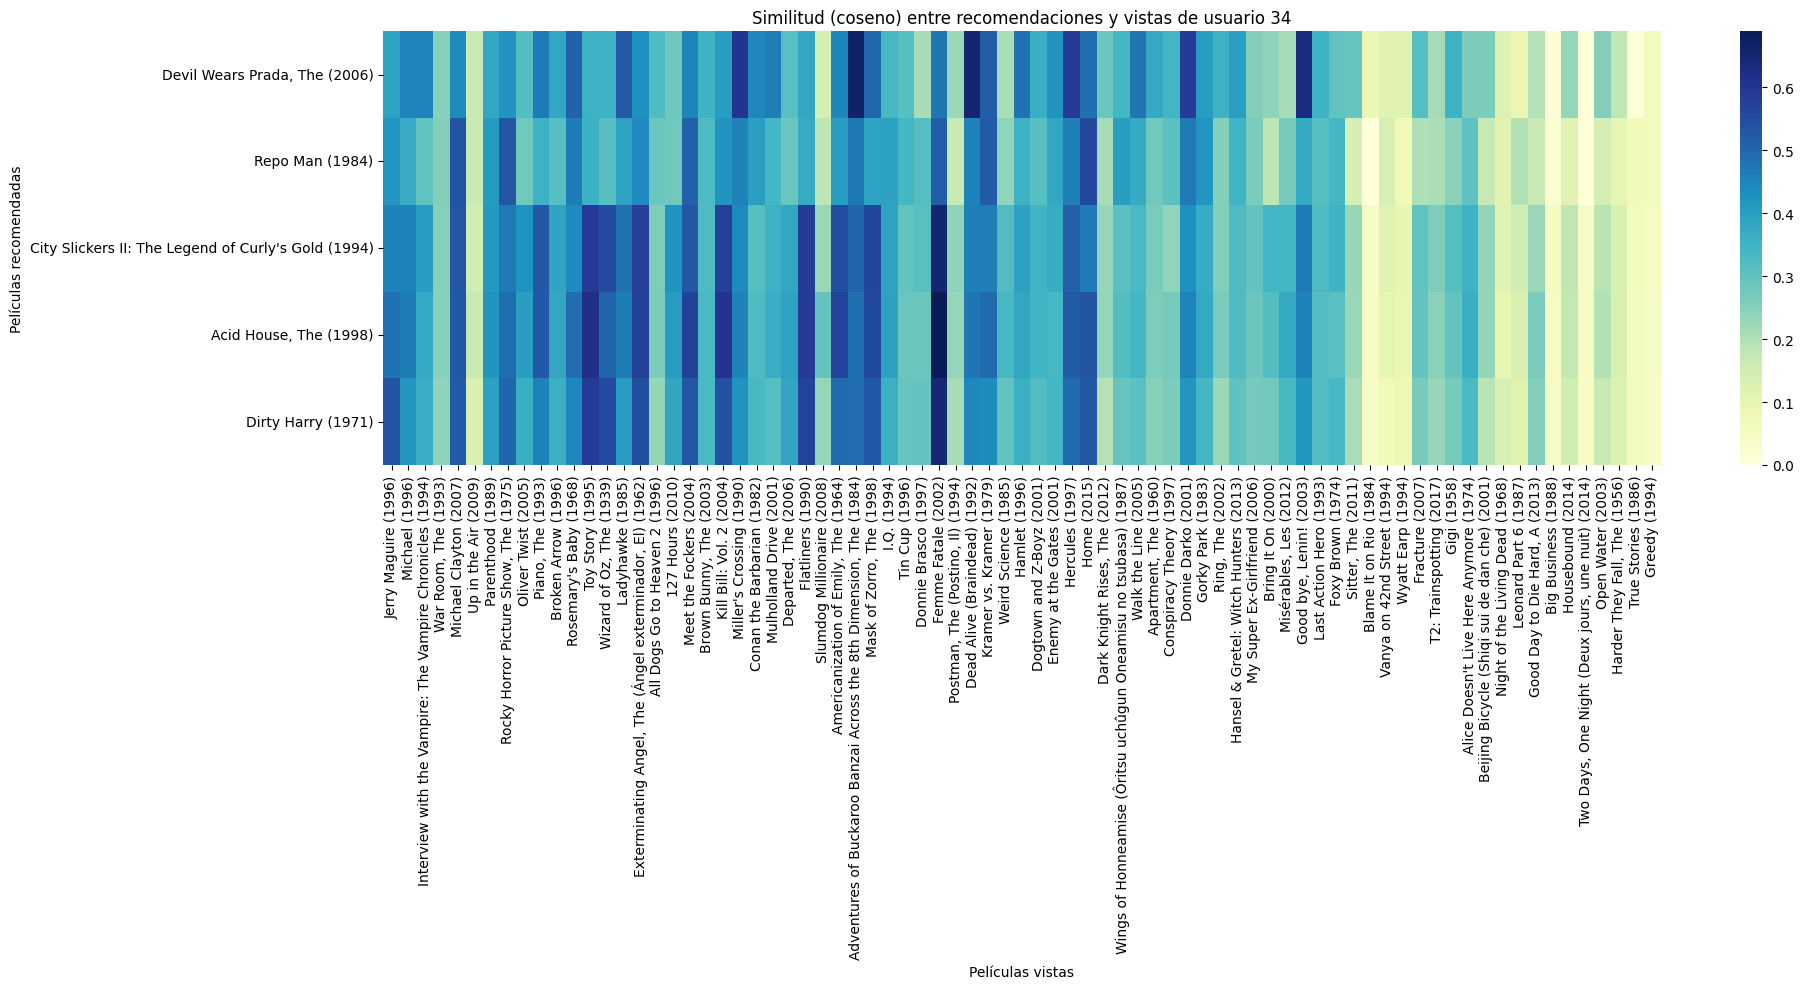

Devil Wears Prada, The (2006): max_sim=0.66, mean_sim=0.34
Repo Man (1984): max_sim=0.56, mean_sim=0.30
City Slickers II: The Legend of Curly's Gold (1994): max_sim=0.65, mean_sim=0.34
Acid House, The (1998): max_sim=0.69, mean_sim=0.35
Dirty Harry (1971): max_sim=0.65, mean_sim=0.33


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#indices
userInx = np.where(usuarios == usuario_id)[0][0]
tituloInx = {t:i for i,t in enumerate(peliculas)}
matrizT = matriz_np.T

# Comparacion de peliculas vistas y recomendadas
pelisVistas = np.where(matriz_np[userInx] > 0)[0]
pelisRec = [tituloInx[t] for t in pelisRecomendadas]


iVistas = matrizT[pelisVistas]
iRecomendadas = matrizT[pelisRec]

similitud = cosine_similarity(iRecomendadas, iVistas)


plt.figure(figsize=(20, 10))
sns.heatmap(
    similitud,
    xticklabels=[peliculas[i] for i in pelisVistas],
    yticklabels=pelisRecomendadas,
    cmap="YlGnBu",
    annot=False,
    fmt=".2f"
)
plt.xlabel("Películas vistas")
plt.ylabel("Películas recomendadas")
plt.title(f"Similitud (coseno) entre recomendaciones y vistas de usuario {usuario_id}")
plt.tight_layout()
plt.show()

max_sim = similitud.max(axis=1)
mean_sim = similitud.mean(axis=1)
for title, mx, mn in zip(pelisRecomendadas, max_sim, mean_sim):
    print(f"{title}: max_sim={mx:.2f}, mean_sim={mn:.2f}")